In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
from tqdm import tqdm
from math import sqrt

In [2]:
file = open('model_2d_A.pkl', 'rb')

info = pickle.load(file)
coordinates = pickle.load(file)
radii = pickle.load(file)
file.close()

n_atoms = coordinates.shape[0]

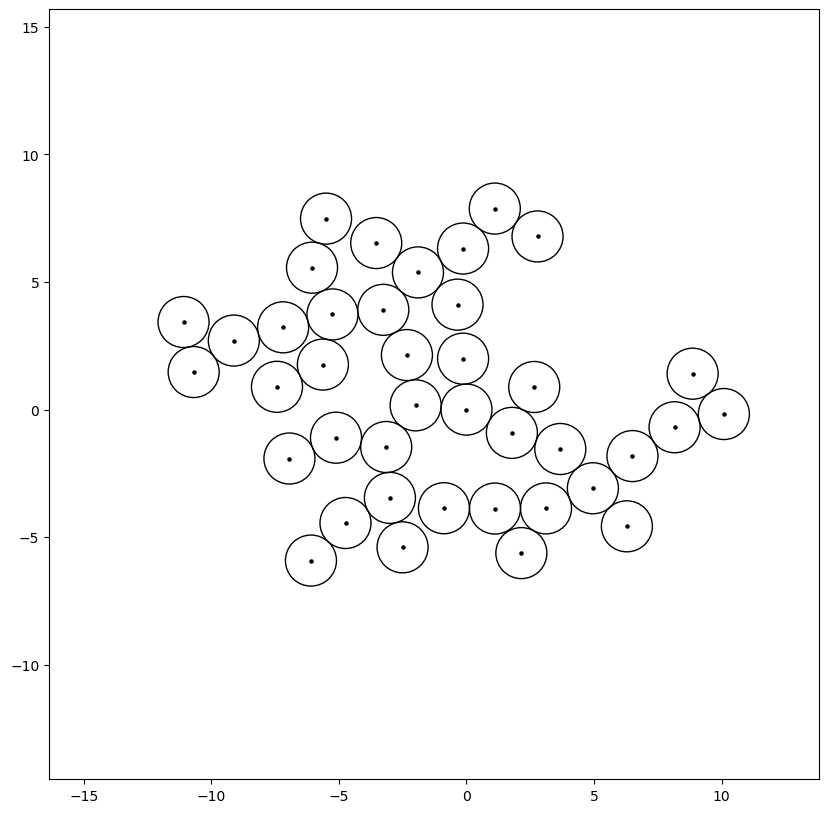

In [3]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_atoms):
    ax.add_patch(plt.Circle(coordinates[ii,:], radius= 1.0, color='k', fill=False))

plt.scatter(coordinates[:,0], coordinates[:,1], s=5, c='k')

l_box = np.abs(coordinates).max() + 4.0
center = coordinates.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

In [4]:
from scipy.spatial import Voronoi

In [5]:
voronoi = Voronoi(coordinates)

In [6]:
centers = voronoi.vertices
n_alphaspheres = centers.shape[0]

In [7]:
atoms_of_alphasphere = {ii:[] for ii in range(n_alphaspheres)}
atoms_of_alphasphere[-1] = []
alphaspheres_of_atom = {ii:[] for ii in range(n_atoms)}

In [8]:
for atom_index, region_index in enumerate(voronoi.point_region):
    for alphasphere_index in voronoi.regions[region_index]:
        atoms_of_alphasphere[alphasphere_index].append(atom_index)
        alphaspheres_of_atom[atom_index].append(alphasphere_index)

In [11]:
def is_permeable_2(rp, discs, rs):

    disc1 = discs[0,:]
    disc2 = discs[1,:]

    r1 = rs[0]
    r2 = rs[1]

    v12 = disc2-disc1
    d12 = sqrt(v12[0]**2+v12[1]**2)

    if d12>=r1+r2+2*rp:

        return True

    return False


In [12]:
import networkx as nx

rp = 0.5

G = nx.Graph()

for ii in tqdm(range(-1,n_alphaspheres)):

    G.add_node(ii)
    
    neighbors=[]
    for jj in atoms_of_alphasphere[ii]:
        for kk in alphaspheres_of_atom[jj]:
            if kk>ii:
                neighbors.append(kk)
    neighbors=np.unique(neighbors)
    
    for jj in neighbors:
        common = np.intersect1d(atoms_of_alphasphere[ii], atoms_of_alphasphere[jj], assume_unique=True)
        if len(common)==2:
            discs = coordinates[common]
            rs = radii[common]
            if is_permeable_2(rp, discs, rs):
                G.add_edge(ii,jj,face=common)            
        elif len(common)==3:
            discs = coordinates[common]
            rs = radii[common]
            #if is_permeable_3(rp, discs, rs):
            #    G.add_edge(ii,jj,face=common)
            print('si')
        elif len(common)>3:
            print('ups')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 2774.65it/s]


In [15]:
G.number_of_nodes()

69

In [16]:
G.number_of_edges()

41

In [32]:
components = list(nx.connected_components(G))

In [33]:
len(components)

28

In [34]:
len(components[0])

30

In [35]:
for ii in range(len(components)):
    if len(components[ii])>1:
        print(ii, components[ii])

0 {2, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 34, 37, 38, 47, 48, 58, 59, 60, 65, 66, 67, -1}
2 {1, 4, 36, 44, 45, 17, 25}
7 {51, 22}
9 {52, 53, 54, 55, 27}
27 {64, 63}


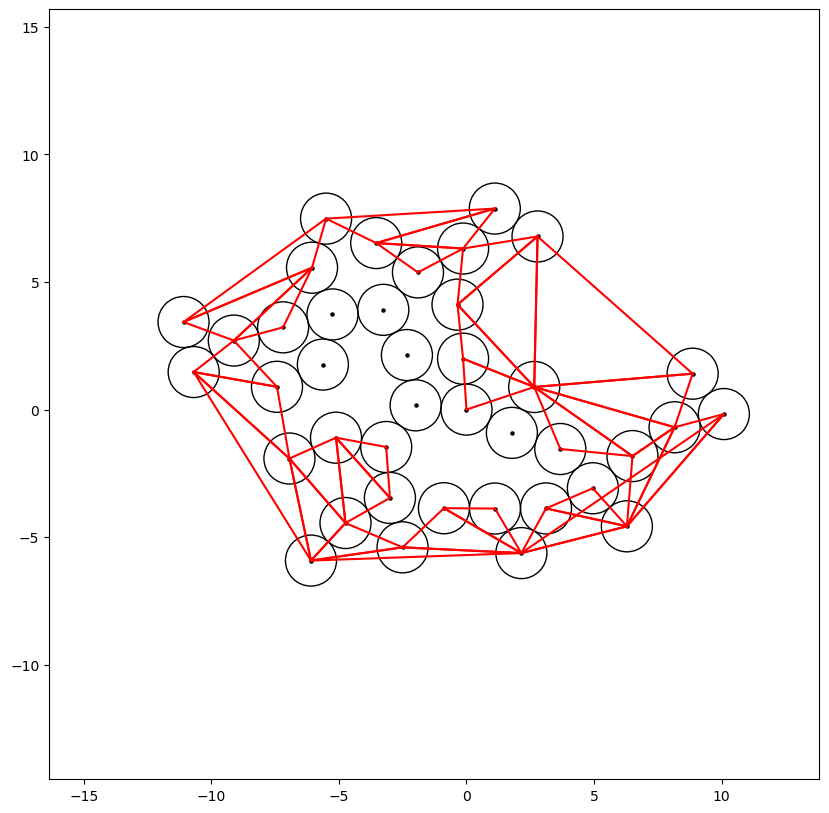

In [41]:
component_index = 0

plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_atoms):
    ax.add_patch(plt.Circle(coordinates[ii,:], radius= 1.0, color='k', fill=False))

plt.scatter(coordinates[:,0], coordinates[:,1], s=5, c='k')

for asphere_index in components[component_index]:
    aux = atoms_of_alphasphere[asphere_index]
    plt.plot(coordinates[[aux[0],aux[1]], 0], coordinates[[aux[0],aux[1]], 1], 'r')
    plt.plot(coordinates[[aux[0],aux[2]], 0], coordinates[[aux[0],aux[2]], 1], 'r')
    plt.plot(coordinates[[aux[1],aux[2]], 0], coordinates[[aux[1],aux[2]], 1], 'r')


l_box = np.abs(coordinates).max() + 4.0
center = coordinates.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()